In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8# enter the number of inside corners in x
ny = 6# enter the number of inside corners in y

objp  = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

 .. starting  


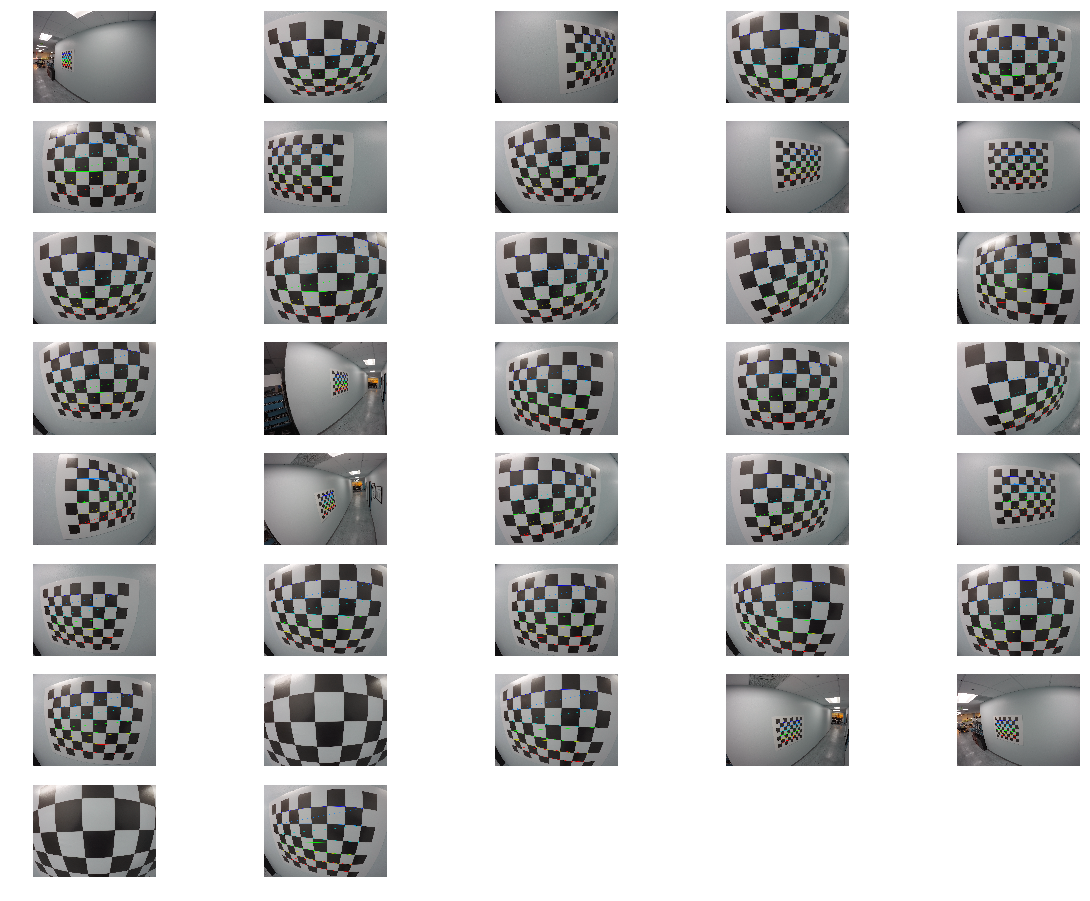

 .. completed 


In [4]:
import matplotlib.pyplot as plt
import glob
import cv2
import pickle


objpoints =[]
imgpoints =[]
print ( " .. starting  ")
plt.figure(figsize=(20, 20))

plt.subplot(10, 5, 1 )
plt.axis('off')
i = 0
for fname in glob.glob("./calibration_images/*"):
#     print (name)\
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners )


    i += 1
    plt.subplot(10, 5, i )
    plt.axis('off')
    plt.imshow(img)
    

plt.show()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )    
print ( " .. completed ")